----
# Cuaderno 2 - Repaso de Pandas, Matplotlib, Seaborn y Plotly
## Ariel Palazzesi - 2026
----

En este cuaderno realizaremos un repaso integral de las principales librerías para manipulación y visualización de datos en Python. Trabajaremos nuevamente sobre un dataset de ventas disponible en Kaggle.

## Importación de librerías necesarias

Este fragmento de código importa cuatro librerías importantes para análisis y visualización de datos en Python: `pandas` para manipulación de datos tabulares, `matplotlib.pyplot` y `seaborn` para gráficos estáticos y personalizados, y `plotly.express` para gráficos interactivos. Luego, configura `seaborn` para que utilice un estilo de gráficos con fondo blanco y líneas de cuadrícula (`whitegrid`), lo que mejora la legibilidad de las visualizaciones.

Finalmente, ajusta el tamaño predeterminado de las figuras generadas con `matplotlib` a 8 pulgadas de ancho por 5 pulgadas de alto. Esto asegura que los gráficos tengan una escala adecuada y uniforme en la salida visual.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

## Carga del dataset

Trabajaremos con el dataset **'Superstore Sales Dataset'** de Kaggle.

Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting


Este código carga un archivo CSV llamado `train.csv` ubicado en la misma carpeta donde se ejecuta el script, o en la carpeta de Colab.

Utiliza `pandas` para leer el archivo y almacena los datos en un DataFrame llamado `df`. Luego, con `df.head()`, muestra las primeras cinco filas del DataFrame, lo que permite obtener una vista rápida de las primeras observaciones y de la estructura general de los datos (columnas y tipos de valores) que contiene el archivo.

In [ ]:
ruta = 'train.csv'
df = pd.read_csv(ruta)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Pandas - Exploración y limpieza básica

Este bloque realiza un análisis exploratorio básico del DataFrame `df`.

* Primero, `df.info()` muestra información general como el número de filas, columnas, nombres de columnas, cantidad de valores no nulos y tipo de datos de cada columna.

* Luego, `df.isnull().sum()` detecta valores nulos, indicando cuántos faltantes hay en cada columna.

* Después, `df.describe()` genera un resumen estadístico con métricas como media, mediana, desviación estándar, valores mínimo y máximo, entre otros, para las columnas numéricas.

* Finalmente, `df[df['Sales'] > 1000].head()` filtra las filas donde las ventas (`Sales`) superan los 1000 y muestra las primeras cinco de esas filas, permitiendo analizar rápidamente las observaciones con ventas altas.



In [ ]:
# Información general
df.info()

# Detectar valores nulos
df.isnull().sum()

# Resumen estadístico
df.describe()

# Filtrado de ventas altas
df[df['Sales'] > 1000].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184
24,25,CA-2016-106320,25/09/2016,30/09/2016,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630
27,28,US-2016-150630,17/09/2016,21/09/2016,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430
35,36,CA-2017-117590,08/12/2017,10/12/2017,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544
54,55,CA-2017-105816,11/12/2017,17/12/2017,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,10024.0,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950


## Matplotlib - Gráficos básicos

Este fragmento genera dos gráficos utilizando `matplotlib`.

El primero es un histograma de la columna `Sales`, que muestra la distribución de las ventas dividiendo los datos en 30 intervalos (`bins=30`). El gráfico permite visualizar la frecuencia con la que ocurren diferentes rangos de ventas y está personalizado con un color celeste (`skyblue`), título y etiquetas para los ejes.

El segundo es un gráfico de barras que cuenta la cantidad de registros por cada categoría presente en la columna `Category`. Usa `value_counts()` para obtener la frecuencia de cada categoría y luego las representa en barras verticales con color coral. Este gráfico permite observar cuántas ventas o registros corresponden a cada categoría dentro del conjunto de datos.

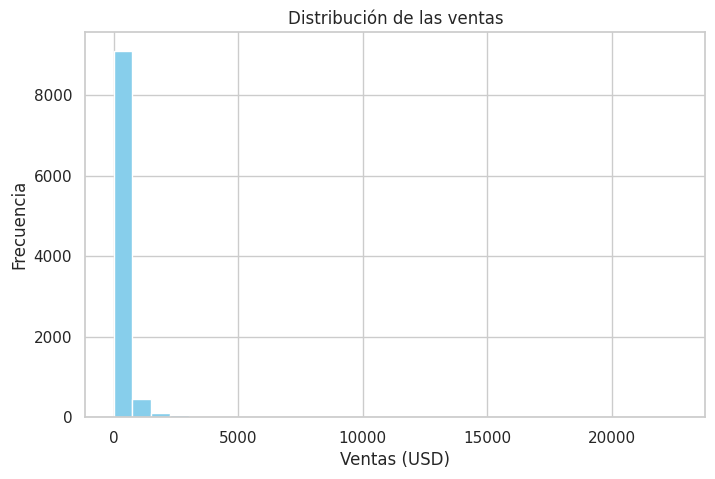

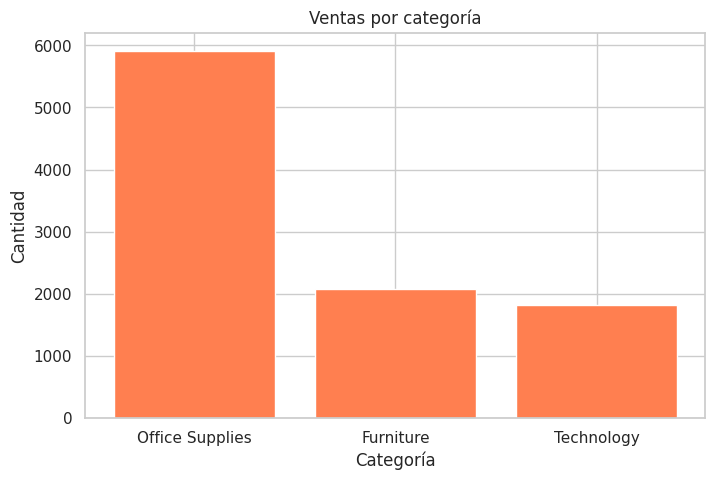

In [ ]:
# Histograma
plt.hist(df['Sales'], bins=30, color='skyblue')
plt.title('Distribución de las ventas')
plt.xlabel('Ventas (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras
cat_counts = df['Category'].value_counts()
plt.bar(cat_counts.index, cat_counts.values, color='coral')
plt.title('Ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()

## Seaborn - Visualizaciones estadísticas

En este código se crean dos visualizaciones avanzadas para el análisis de datos. Primero, un boxplot que compara la distribución de las ventas (`Sales`) entre las distintas categorías (`Category`). Utilizando `seaborn`, el gráfico muestra la mediana, los cuartiles y posibles valores atípicos de las ventas para cada categoría, lo que ayuda a identificar patrones o diferencias significativas entre ellas.

Luego, se genera un heatmap (mapa de calor) de la matriz de correlación de las columnas numéricas del DataFrame. La función `df.corr(numeric_only=True)` calcula las correlaciones entre las variables numéricas y `annot=True` agrega los valores numéricos dentro de cada celda. El parámetro `cmap='coolwarm'` aplica una paleta de colores que va de tonos fríos a cálidos según la intensidad de la correlación. Este gráfico es útil para identificar relaciones lineales entre variables.

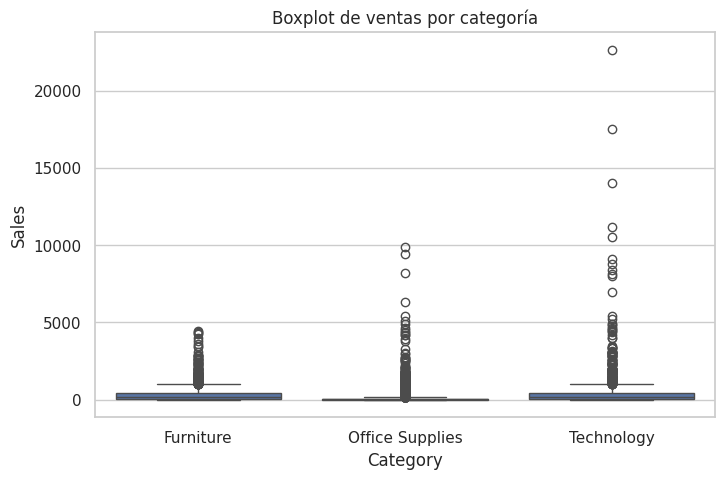

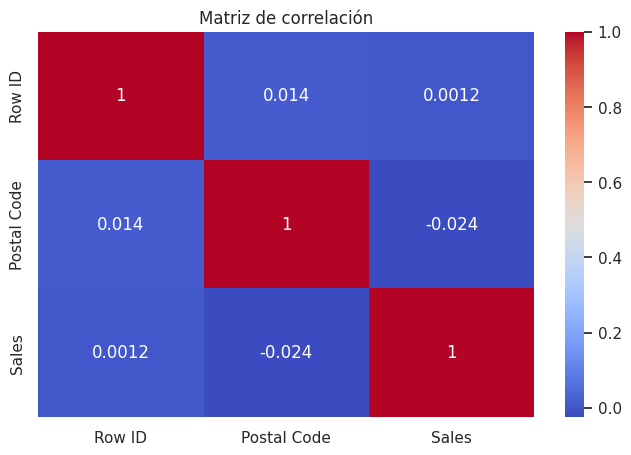

In [ ]:
# Boxplot
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Boxplot de ventas por categoría')
plt.show()

# Heatmap de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Plotly - Visualizaciones interactivas

Este bloque crea dos visualizaciones interactivas utilizando `plotly.express`.

El primer gráfico es un scatter plot (diagrama de dispersión) donde se representan las ventas (`Sales`) en el eje X y los países (`Country`) en el eje Y. Además, cada punto se colorea según la categoría (`Category`) a la que pertenece, lo que permite comparar visualmente las ventas por país y categoría de producto.

El segundo gráfico es un gráfico de barras donde se agrupan las ventas totales por región (`Region`). Las barras se colorean según la región y permiten identificar rápidamente qué regiones tienen mayores o menores volúmenes de ventas.

Ambos gráficos son interactivos, lo que permite al usuario explorar los datos dinámicamente, por ejemplo, pasando el cursor sobre los puntos o las barras para ver detalles adicionales.

In [ ]:
fig1 = px.scatter(df, x='Sales', y='Country', color='Category', title='Ventas vs Paises')
fig1.show()

fig2 = px.bar(df, x='Region', y='Sales', color='Region', title='Ventas totales por región')
fig2.show()

## Seaborn - Countplot

Este código genera un gráfico de barras con `seaborn` para visualizar la cantidad de registros por subcategoría. Utiliza `countplot()` para contar automáticamente cuántas veces aparece cada valor único en la columna `Sub-Category` del DataFrame `df`. La opción `order=df['Sub-Category'].value_counts().index` asegura que las barras se muestren ordenadas de mayor a menor según la frecuencia de cada subcategoría. Luego, `plt.xticks(rotation=45)` rota las etiquetas del eje X 45 grados para que los nombres de las subcategorías sean más legibles, y `plt.title()` agrega un título descriptivo al gráfico. Finalmente, `plt.show()` muestra la visualización.

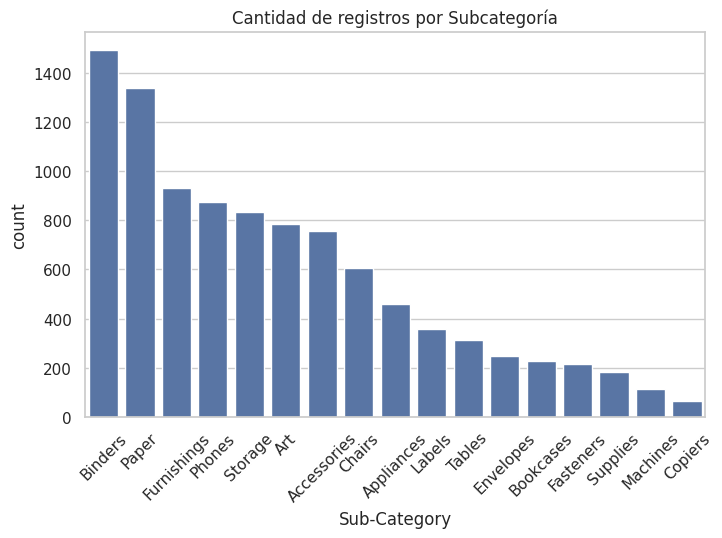

In [ ]:
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de registros por Subcategoría')
plt.show()

## Plotly - Gráfico de líneas interactivo

Este código convierte la columna `Order Date` en un objeto de tipo fecha utilizando `pd.to_datetime()`, especificando que el formato de las fechas es día/mes/año (`dayfirst=True`).

Luego, agrupa el DataFrame por la fecha de la orden (`Order Date`) y suma las columnas numéricas, como `Sales`, creando un nuevo DataFrame `df_fecha` con la fecha como índice.

Finalmente, genera un gráfico de línea interactivo con `plotly.express` que muestra la evolución de las ventas (`Sales`) a lo largo del tiempo, utilizando `Order Date` en el eje X y las ventas en el eje Y.

Este gráfico permite identificar tendencias y patrones temporales en los datos de ventas.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df_fecha = df.groupby('Order Date').sum(numeric_only=True).reset_index()
px.line(df_fecha, x='Order Date', y='Sales', title='Ventas a lo largo del tiempo')

## Conclusión y cierre

En este cuaderno repasamos herramientas fundamentales para el análisis exploratorio de datos, como `Pandas`, `Matplotlib`, `Seaborn` y `Plotly`. Cada una de ellas aporta una perspectiva distinta para observar y entender los datos antes de construir modelos predictivos.

Aprendimos a detectar valores nulos, duplicados e inconsistencias, a visualizar distribuciones y relaciones entre variables, y a tomar decisiones informadas sobre qué datos limpiar o transformar. Estas habilidades no solo mejoran la calidad del análisis, sino que son esenciales para construir modelos confiables.

Este trabajo exploratorio y de limpieza es el primer paso para preparar nuestros datos y avanzar en el desarrollo de soluciones de Machine Learning. Cuanto más clara sea nuestra comprensión de los datos, mejores serán los modelos que construyamos sobre ellos.
